# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

# Base de Dados

In [2]:
SEED = 6138
columns_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("Dados/adult.data", names=columns_name, index_col=False)

# Análise Exploratória de Dados

explorar a base de dados para mostrar outliers, nivel de separatividade dos dados em relação as classes (grafico de dispersao), 

In [3]:
df.head(1)

age   workclass  fnlwgt   education  education-num  marital-status  \
0   39   State-gov   77516   Bachelors             13   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male          2174             0   

   hours-per-week  native-country   class  
0              40   United-States   <=50K

## Tipos dos dados

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [5]:
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['class'] = df['class'].astype('category')
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

## Descrição dos dados

In [6]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## Dados duplicados

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, class]
Index: []

## Preenchendo dados faltantes

In [9]:
def tratamento_faltantes(df, columns_name):
    ## Printa os atributos com dados faltantes (" ?")
    for coluna in columns_name:
        if len(df[df[coluna] == " ?"]) > 0:
            print(coluna)
            print(len(df[df[coluna] == " ?"]))
    
    ## Tratamento dos dados faltantes, transforma para numerico, substitui " ?" por NaN e interpola os NaN
    atr_faltantes = ["workclass", "occupation", "native-country"]
    for atr in atr_faltantes:
        categorias_atr = df.groupby(atr).sum().index.tolist()
        label_encoder = preprocessing.LabelEncoder()
        label_encoder.fit(categorias_atr)
        df[f"{atr}-num"] = label_encoder.transform(df[atr])
        df[f"{atr}-num"] = df[f"{atr}-num"].replace(0, np.nan)
        df[f"{atr}-num"] = df[f"{atr}-num"].interpolate(method='nearest')

In [10]:
tratamento_faltantes(df, columns_name)

workclass
1836
occupation
1843
native-country
582


In [11]:
#for coluna in columns_name:
#    if len(df[df[coluna] == " ?"]) > 0:
#        print(coluna)
#        print(len(df[df[coluna] == " ?"]))

Para cada atributo que tem dados faltantes vamos preencher utilizando a interpolação, para isso passamos para numerico antes.

In [12]:
#atr_faltantes = ["workclass", "occupation", "native-country"]
#for atr in atr_faltantes:
#    categorias_atr = df.groupby(atr).sum().index.tolist()
#    label_encoder = preprocessing.LabelEncoder()
#    label_encoder.fit(categorias_atr)
#    df[f"{atr}-num"] = label_encoder.transform(df[atr])
#    df[f"{atr}-num"] = df[f"{atr}-num"].replace(0, np.nan)
#    df[f"{atr}-num"] = df[f"{atr}-num"].interpolate(method='nearest')

In [13]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  \
0          2174             0              40   United-States   <=50K   
1             0             0              13   United-States   <=50K   
2             0             0              40   United-States   <=50K   
3             0             0              40   United-States   <=50K   
4             0             0              40            Cuba   <=50K   

   workclass-num  occupation-num  native-country-num  
0            7.0             1.0                39.0  
1            6.0             4.0                39.0  
2            4.0             6.0                39.0  
3            4.0             6.0                39.0  
4            4.0            10.0                 5.0

## Checando outliers

<AxesSubplot:>

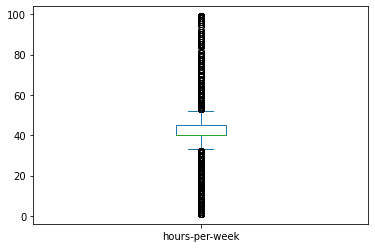

In [14]:
df['hours-per-week'].plot.box()

<AxesSubplot:>

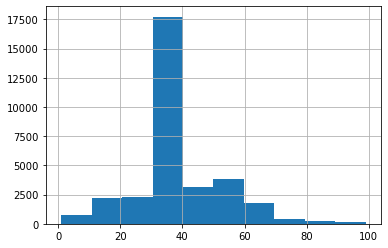

In [15]:
df['hours-per-week'].hist()

<AxesSubplot:>

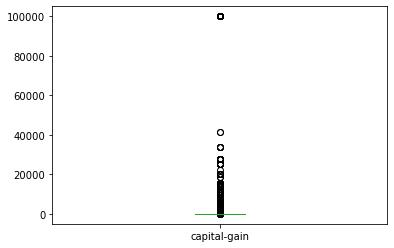

In [16]:
df['capital-gain'].plot.box()

<AxesSubplot:>

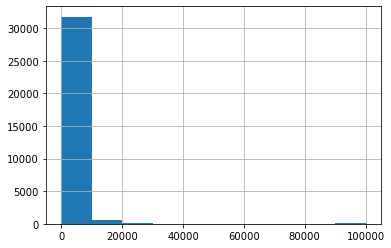

In [17]:
df['capital-gain'].hist()

<AxesSubplot:>

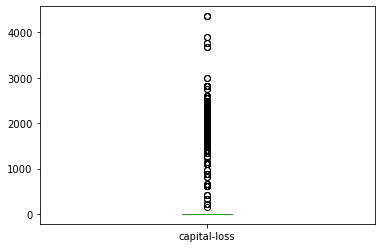

In [18]:
df['capital-loss'].plot.box()

<AxesSubplot:>

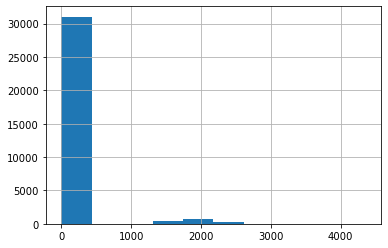

In [19]:
df['capital-loss'].hist()

In [20]:
#q1 = dados['idade_log'].quantile(q=0.25)
#q3 = dados['idade_log'].quantile(q=0.75)
#iqr = q3 - q1
#print(iqr)

## Colunas redundantes

In [21]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  \
0          2174             0              40   United-States   <=50K   
1             0             0              13   United-States   <=50K   
2             0             0              40   United-States   <=50K   
3             0             0              40   United-States   <=50K   
4             0             0              40            Cuba   <=50K   

   workclass-num  occupation-num  native-country-num  
0            7.0             1.0                39.0  
1            6.0             4.0                39.0  
2            4.0             6.0                39.0  
3            4.0             6.0                39.0  
4            4.0            10.0                 5.0

education e education-num significam a mesma coisa, vamos utilizar education-num e dropar education (education-num já é a codificação ordinal de education)

In [22]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [23]:
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

## TO DO: Plotar região

## Frequência das variáveis categóricas (Value counts)

In [24]:
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [25]:
df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [26]:
df['marital-status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [27]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [29]:
df['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [30]:
df['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

In [31]:
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [32]:
df['class'].value_counts()

 <=50K    24698
 >50K      7839
Name: class, dtype: int64

# Carregando e processando conjunto de teste

In [33]:
df_test = pd.read_csv("Dados/adult.test", names=columns_name, index_col=False, skiprows=1)
df_test.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country    class  
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
4             0              30   United-States   <=50K.

In [34]:
tratamento_faltantes(df_test, columns_name)

workclass
963
occupation
966
native-country
274


In [35]:
df_test.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country    class  workclass-num  \
0             0              40   United-States   <=50K.            4.0   
1             0              50   United-States   <=50K.            4.0   
2             0              40   United-States    >50K.            2.0   
3             0              40   United-States    >50K.            4.0   
4             0              30   United-States   <=50K.            4.0   

   occupation-num  native-country-num  
0             7.0                38.0  
1             5.0                38.0  
2            11.0                38.0  
3             7.0                38.0  
4             7.0                38.0

## Codificação das variáveis categóricas (variáveis nominais, faremos One Hot Encoder)

In [36]:
def onehot_encoder(df):
    colunas_cat = ["workclass-num","marital-status", "occupation-num", "relationship", "race", "sex", "native-country-num"]
    for coluna in colunas_cat:
        print(coluna)
        df_coluna = pd.get_dummies(df[coluna], prefix=coluna)
        df = df.join(df_coluna)
    return df

In [37]:
df = onehot_encoder(df)
df.head()

workclass-num
marital-status
occupation-num
relationship
race
sex
native-country-num


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   ...  native-country-num_32.0  native-country-num_33.0  \
0  ...                        0                        0   
1  ...                        0                        0   
2  ...                        0                        0   
3  ...                        0                        0   
4  ...                        0                        0   

   native-country-num_34.0 native-country-num_35.0 native-country-num_36.0  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   

   native-country-num_37.0  native-country-num_38.0  native-country-num_39.0  \
0                        0                        0                        1   
1                        0                        0                        1   
2                        0                        0                        1   
3                        0                        0                        1   
4                        0                        0                        0   

   native-country-num_40.0  native-country-num_41.0  
0                        0                        0  
1                        0                        0  
2                        0                        0  
3                        0                        0  
4                        0                        0  

[5 rows x 101 columns]

In [38]:
df_test = onehot_encoder(df_test)
df_test.head()

workclass-num
marital-status
occupation-num
relationship
race
sex
native-country-num


age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  ...  \
0   Machine-op-inspct    Own-child   Black     Male  ...   
1     Farming-fishing      Husband   White     Male  ...   
2     Protective-serv      Husband   White     Male  ...   
3   Machine-op-inspct      Husband   Black     Male  ...   
4                   ?    Own-child   White   Female  ...   

   native-country-num_31.0  native-country-num_32.0  native-country-num_33.0  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

  native-country-num_34.0 native-country-num_35.0  native-country-num_36.0  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   native-country-num_37.0  native-country-num_38.0  native-country-num_39.0  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        0                        1                        0   
3                        0                        1                        0   
4                        0                        1                        0   

   native-country-num_40.0  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 100 columns]

## Normalizando variáveis contínuas

In [39]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
df[["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]] = normalize.fit_transform(df[["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]])

In [40]:
df[["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]]

age    fnlwgt  capital-gain  capital-loss  hours-per-week
0      0.301370  0.044302      0.021740           0.0        0.397959
1      0.452055  0.048238      0.000000           0.0        0.122449
2      0.287671  0.138113      0.000000           0.0        0.397959
3      0.493151  0.151068      0.000000           0.0        0.397959
4      0.150685  0.221488      0.000000           0.0        0.397959
...         ...       ...           ...           ...             ...
32556  0.136986  0.166404      0.000000           0.0        0.377551
32557  0.315068  0.096500      0.000000           0.0        0.397959
32558  0.561644  0.094827      0.000000           0.0        0.397959
32559  0.068493  0.128499      0.000000           0.0        0.193878
32560  0.479452  0.187203      0.150242           0.0        0.397959

[32537 rows x 5 columns]

## Dividindo conjuntos de dados

In [41]:
X_train = df.drop(["class", "education", "workclass", "workclass-num","marital-status", "occupation", "occupation-num", "relationship", "race", "sex", "native-country", "native-country-num"], axis = 1).to_numpy()
y_train = df["class"].values
#X_test = df_test.drop(["class", "education", "workclass", "workclass-num","marital-status", "occupation", "occupation-num", "relationship", "race", "sex", "native-country", "native-country-num"], axis = 1).to_numpy()
#y_test = df_test["class"].values

In [42]:
df.drop(["class", "education", "workclass", "workclass-num","marital-status", "occupation", "occupation-num", "relationship", "race", "sex", "native-country", "native-country-num"], axis = 1)

age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.301370  0.044302             13      0.021740           0.0   
1      0.452055  0.048238             13      0.000000           0.0   
2      0.287671  0.138113              9      0.000000           0.0   
3      0.493151  0.151068              7      0.000000           0.0   
4      0.150685  0.221488             13      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404             12      0.000000           0.0   
32557  0.315068  0.096500              9      0.000000           0.0   
32558  0.561644  0.094827              9      0.000000           0.0   
32559  0.068493  0.128499              9      0.000000           0.0   
32560  0.479452  0.187203              9      0.150242           0.0   

       hours-per-week  workclass-num_1.0  workclass-num_2.0  \
0            0.397959                  0                  0   
1            0.122449                  0                  0   
2            0.397959                  0                  0   
3            0.397959                  0                  0   
4            0.397959                  0                  0   
...               ...                ...                ...   
32556        0.377551                  0                  0   
32557        0.397959                  0                  0   
32558        0.397959                  0                  0   
32559        0.193878                  0                  0   
32560        0.397959                  0                  0   

       workclass-num_3.0  workclass-num_4.0  ...  native-country-num_32.0  \
0                      0                  0  ...                        0   
1                      0                  0  ...                        0   
2                      0                  1  ...                        0   
3                      0                  1  ...                        0   
4                      0                  1  ...                        0   
...                  ...                ...  ...                      ...   
32556                  0                  1  ...                        0   
32557                  0                  1  ...                        0   
32558                  0                  1  ...                        0   
32559                  0                  1  ...                        0   
32560                  0                  0  ...                        0   

       native-country-num_33.0  native-country-num_34.0  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
32556                        0                        0   
32557                        0                        0   
32558                        0                        0   
32559                        0                        0   
32560                        0                        0   

       native-country-num_35.0  native-country-num_36.0  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
32556                        0                        0   
32557                        0                        0   
32558                        0                        0   
32559                        0                        0   
32560                        0                        0   

       native-country-num_37.0  native-country-

# Testando validação

In [45]:
#7. Realizar busca com o gridsearch ou randonsearhc para encontrar os melhores parametros de cada modelo
# define models
decisionTree = DecisionTreeClassifier()
#svc = SVC()

# define evaluation
cv = model_selection.StratifiedKFold(n_splits=10)

# define search space for decision tree
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [2, 3]


# define random search for decision tree
search = RandomizedSearchCV(decisionTree, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=SEED)

# execute search
result_tree = search.fit(X_train, y_train)

# summarize result for decision tree
print('=========Random Search Results for TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

=========Random Search Results fro TREE==========
Best Score: 0.8561640609368005
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 11, 'criterion': 'entropy'}


# KNN (Livy)

# Árvore de decisão simples (Priscilla)

# Random Forest (Lucas)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo a lista de parâmetros e seus possíveis valores.

parameters = {
    "n_estimators": range(10, 301, 10),
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
}


# Notem que a validação agora demora mais que com os modelos que usamos até então.
grid_search = GridSearchCV(RandomForestClassifier(random_state=SEED), 
                    parameters,
                    scoring  = "f1_weighted",
                    n_jobs= -1, 
                    verbose=4,
                    cv = 3)# Quando atribuímos um número inteiro (quantidade de folds) ao parâmetro cv, a validação cruzada é estratificada

grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_search.best_params_
print(best_params)

In [ ]:
model = RandomForestClassifier(**best_params, random_state = SEED)

print("Train >> ", score_model(model, X_train, y_train))
model.fit(X_train, y_train)
print("Test score pós-validação: ", f1_weighted(y_test, model.predict(X_test)))

model = RandomForestClassifier(random_state = SEED)
model.fit(X_train, y_train)
print("Test score PRÉ-validação: ", f1_weighted(y_test, model.predict(X_test)))

# Rede neural MLP (Mari)

# Comitê de Redes Neurais (Laianna)